# IMPORTING REQUIRED LIBRARIES 

In [5]:
#For Data Representation
import pandas as pd
import numpy as np

#For Backward Stepwise Regression
import statsmodels.api as sm

#For Model Training
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm

#For Metric Scoring For Checking Accuracy And Model Validation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#For Label Encoding and Prepocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#For Splitting Data 
from sklearn.model_selection import train_test_split

#For Data Visualization
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)
%matplotlib inline

# DATA READING

In [6]:
#Reading CSV Dataset as Pandas DataFrame
data = pd.read_csv("pakwheels.csv")

#Printing Data Shape : No. of Rows x Cols
data.shape

(56186, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56186 entries, 0 to 56185
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ad No            56186 non-null  int64 
 1   Name             56186 non-null  object
 2   Price            56186 non-null  object
 3   Model Year       56186 non-null  int64 
 4   Location         56186 non-null  object
 5   Mileage          56186 non-null  int64 
 6   Registered City  56186 non-null  object
 7   Engine Type      54904 non-null  object
 8   Engine Capacity  56186 non-null  object
 9   Transmission     56186 non-null  object
 10  Color            56186 non-null  object
 11  Assembly         56186 non-null  object
 12  Body Type        49717 non-null  object
 13  Features         50765 non-null  object
 14  Last Updated     56186 non-null  object
 15  URL              56186 non-null  object
dtypes: int64(3), object(13)
memory usage: 6.9+ MB


In [8]:
data.head()

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,4096758,Toyota Vitz F 1.0 2017,2385000,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,Petrol,1000 cc,Automatic,Silver,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",11-Jul-20,https://www.pakwheels.com/used-cars/toyota-vit...
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000,2019,Peshawar KPK,11111,Islamabad,Petrol,1300 cc,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...
2,4168298,Suzuki Alto VXL 2019,1530000,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,Petrol,660 cc,Automatic,White,Local,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...
3,4168307,Suzuki Alto VXR 2019,1650000,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,Petrol,660 cc,Manual,White,Local,Hatchback,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...
4,4168306,Toyota Corolla XLi VVTi 2010,1435000,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,Petrol,1300 cc,Manual,Black,Local,Sedan,"AM/FM Radio, Air Conditioning, CD Player, Key...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...


# DATA CLEANING

## DROPPING UN-WANTED FIELDS

In [9]:
drop_fields = ['URL','Location','Ad No','Color','Registered City','Features','Last Updated']

data.drop(drop_fields, axis=1, inplace=True)

## DROPPING ROWS WITH NAN OR GARBAGE VALUES

In [10]:
#Droping the Rows without price as we have adequate Dataset of 56,000+ Records
#therefore we can afford to lose some records
data = data[data.Price != 'Call for price']


#Changing data type to price to int32 to save space
data.astype({'Price': 'int32'}).dtypes


#Shape of Updated Data
data.shape

(54914, 9)

## FORMATTING THE DATASET IN READABLE FORM

In [11]:
#Breaking Name into sub categories that are useful

make = [] #Empty List to record brand's name
temp = []

for i in data["Name"]:
    temp = i.split()
    make.append(temp[0])

In [12]:
#Inserting the new categories in the dataset

data.insert(0, "Make", make, True)

In [13]:
#Dropping Old Name From Dataset which is useless now

data.drop(columns = "Name", inplace = True)

## FURTHER DATA CLEANSING: DELETING POOR DATA

In [14]:
#Data of the following Makers/Brands SHOULD Be Kept Only 
wish = ["Audi","BMW","Chevrolet","Daewoo","FAW","Hyundai",
        "Toyota","Honda","Suzuki","Daihatsu","Mitsubishi","Nissan",
        "KIA","Lexus","Mazda","Mercedes","United","Subaru"]

data = data[data['Make'].isin(wish)]

In [15]:
#Data Only of only the following Body SHOULD NOT Be Kept
wish = ["Convertible", "Coupe","Mini Vehicles","Off-Road Vehicles",
        "Single Cabin", "Truck"]

data = data[~data['Body Type'].isin(wish)]

In [16]:
#Replacing combining similar type of body which have different words
data.replace(to_replace =["Mini Van", "Micro Van", "High Roof", "Station Wagon", "Van"], value ="Van",inplace = True)
data.replace(to_replace =["MPV"], value ="Hatchback",inplace = True)
data.replace(to_replace =["Pickup"], value ="Double Cabin",inplace = True)
data.replace(to_replace =["Crossover"], value ="SUV",inplace = True)

#Grouping By To See The Result
data.groupby(["Body Type"])["Body Type"].count()

Body Type
Double Cabin      388
Hatchback       22071
Pick Up           250
SUV              3513
Sedan           18982
Van              3026
Name: Body Type, dtype: int64

In [17]:
data.shape

(54446, 9)

In [18]:
#Convertin Engine Capacity from string to int
engine_power = [] #Empty List to record brand's name
temp = []
for i in data["Engine Capacity"]:
    temp = i.split()
    engine_power.append(int(temp[0]))
    
#Inserting Engine Power in Data and Removie Engine Capacity
data.insert(6, "Power", engine_power, True)
data.drop(columns = "Engine Capacity", inplace = True)


#Renaming "Model Year" Column to "Year" to avoid confusion
data.rename(columns={'Model Year': 'Year'}, inplace=True)
data.rename(columns={'Engine Type': 'Fuel'}, inplace=True)
data.rename(columns={'Body Type': 'Body'}, inplace=True)

## REMOVING OUTLIERS

In [19]:
#FUCTION TO REMOVE OUTLIERS
def removeOutliers(data,col):
    delete = []
    temp = []
    for x in data[col]:
        temp.append(int(x))
    
    data_mean, data_std = np.mean(temp), np.std(temp)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    count = 0
    for i in temp:
        count += 1
        if (i >= lower and i <= upper):
            continue
        else:
            delete.append(count)
    
    data.drop(data.index[delete], inplace=True)
    return data

In [20]:
#REMOVING OUTLIERS IN PRICE MILEAGE AND YEAR FIELDS
data = removeOutliers(data,"Price")
data = removeOutliers(data,"Mileage")
data = removeOutliers(data,"Year")

## DROPPING ALL ROWS WITH ANY NAN VALUE

In [21]:
column_names = []
for i in data.columns:
    column_names.append(str(i))
    data.dropna(subset = [str(i)], inplace=True)

In [22]:
data.shape

(45433, 9)

# DATA PREPARATION

# SEPARATING TARGET VARIABLE FROM THE DATASET

In [23]:
target = data["Price"]
data.drop(columns = ["Price"],inplace=True)
target

0        2385000
1         111000
2        1530000
3        1650000
4        1435000
          ...   
56178    3400000
56179    2450000
56181    3250000
56183    3000000
56185    2250000
Name: Price, Length: 45433, dtype: object

# DATA VISUALIZATION

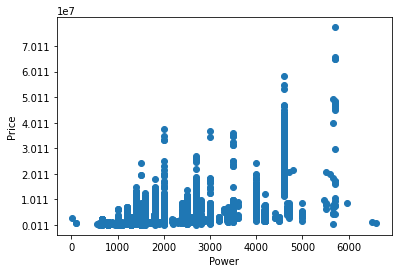

In [24]:
y = []
for i in target:
    y.append(int(i))
target = y

x = data["Power"]
plt.yticks(np.arange(min(y), max(y)+1, 10000000))
plt.scatter(x, y)
plt.xlabel("Power")
plt.ylabel('Price')
plt.show()

#NON-LINEAR RELATIONSHIP B/W PRICE and POWER

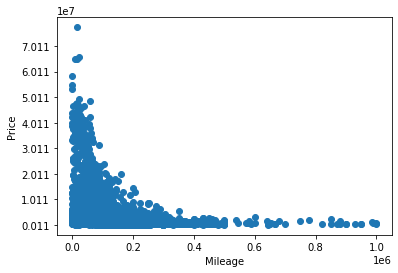

In [25]:
x = data["Mileage"]
plt.yticks(np.arange(min(y), max(y)+1, 10000000))
plt.scatter(x, y)
plt.xlabel("Mileage")
plt.ylabel('Price')
plt.show()

#NON-LINEAR RELATIONSHIP B/W PRICE and MILEAGE 

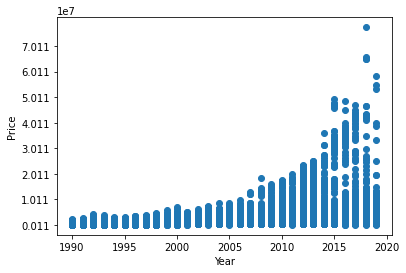

In [26]:
x = data["Year"]
plt.yticks(np.arange(min(y), max(y)+1, 10000000))
plt.scatter(x, y)
plt.xlabel("Year")
plt.ylabel('Price')
plt.show()

#NON-LINEAR RELATIONSHIP B/W PRICE and YEAR 

### NON-LINEAR RELATIONSHIP BETWEEN:
PRICE & YEAR

PRICE & MILEAGE

PRICE & POWER

THEREFORE CONVERT PRICE INTO ITS NATURAL LOGARITHM FORM FOR LINEAR RELATIONSHIP

In [27]:
#CONVERTING PRICE INTO ITS NATURAL LOG (ln(e))
linear_target = []
for x in target:
    x = int (x)
    linear_target.append(np.log(x))

#Replacing PRICE with temp
#target = temp
#target
#print(data.Price)

# LABEL ENCODING TO COVERT CATEGORICAL DATA

In [28]:
#Apply Labels on Make, Model, Engine Type, Transmission, Color & Assembly

le_make = preprocessing.LabelEncoder()
le_fuel = preprocessing.LabelEncoder()
le_transmission = preprocessing.LabelEncoder()
le_assembly = preprocessing.LabelEncoder()
le_body = preprocessing.LabelEncoder()

#Fitting and Transforming Data

make = le_make.fit_transform(data['Make'])
fuel = le_fuel.fit_transform(data['Fuel'])
transmission = le_transmission.fit_transform(data['Transmission'])
assembly = le_assembly.fit_transform(data['Assembly'])
body = le_body.fit_transform(data['Body'])

#Setting Up Data with Labels
new_data = {"Make": make, "Body":body, "Year": data.Year, "Mileage": data.Mileage,
            "Power": data.Power, "Fuel":fuel, "Transmission":transmission,
            "Assembly": assembly}

data = pd.DataFrame(data=new_data)

#How Dataset looks now...
data.head()

,Make,Body,Year,Mileage,Power,Fuel,Transmission,Assembly
0,16,1,2017,9869,1000,2,0,0
1,16,4,2019,11111,1300,2,0,1
2,15,1,2019,17500,660,2,0,1
3,15,1,2019,9600,660,2,1,1
4,16,4,2010,120000,1300,2,1,1


# SCALING DATA TO AVOID BIASNESS

In [29]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
df = pd.DataFrame(data = scaled)

In [30]:
column_names = []
for i in data.columns:
    column_names.append(str(i))

df.columns = column_names
df.head()

,Make,Body,Year,Mileage,Power,Fuel,Transmission,Assembly
0,0.941176,0.2,0.931034,0.009868,0.149453,1.0,0.0,0.0
1,0.941176,0.8,1.000000,0.011110,0.195018,1.0,0.0,1.0
2,0.882353,0.2,1.000000,0.017499,0.097813,1.0,0.0,1.0
3,0.882353,0.2,1.000000,0.009599,0.097813,1.0,1.0,1.0
4,0.941176,0.8,0.689655,0.119999,0.195018,1.0,1.0,1.0


### Non-Linear To Linear Relationship Now

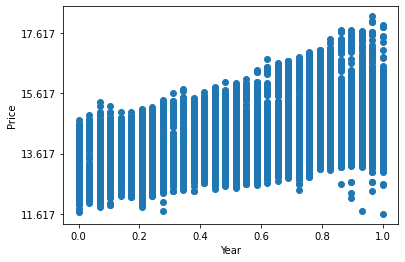

In [31]:
y = linear_target
x = df["Year"]
plt.yticks(np.arange(min(y), max(y)+1, 2))
plt.scatter(x, y)
plt.xlabel("Year")
plt.ylabel('Price')
plt.show()

#LINEAR RELATIONSHIP B/W PRICE and YEAR 

In [32]:
df.describe()

,Make,Body,Year,Mileage,Power,Fuel,Transmission,Assembly
count,45433.000000,45433.000000,45433.000000,45433.000000,45433.000000,45433.000000,45433.000000,45433.000000
mean,0.742707,0.517404,0.734514,0.089931,0.198798,0.954449,0.512403,0.662756
std,0.264536,0.307708,0.215321,0.063230,0.095124,0.188102,0.499852,0.472774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352941,0.200000,0.586207,0.047999,0.149453,1.000000,0.000000,0.000000
50%,0.882353,0.600000,0.793103,0.079999,0.195018,1.000000,1.000000,1.000000
75%,0.941176,0.800000,0.896552,0.119999,0.225395,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# TRAIN & TEST DATA SPLIT

In [33]:
#Spliting Test_Data And Train Data
X_train, X_test, Y_train, Y_test = train_test_split(df,linear_target,test_size=0.2, random_state = 42)

#LENGTH OF TRAINING AND TEST DATA
print('Size of Training Data:',len(Y_train))
print('Size of Testing Data:',len(Y_test))

Size of Training Data: 36346
Size of Testing Data: 9087


# STEPWISE REGRESSION

In [34]:
X = sm.add_constant(X_train)
Y_train = list(Y_train)
reg = sm.OLS(Y_train,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 3.046e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        09:30:13   Log-Likelihood:                -3151.3
No. Observations:               36346   AIC:                             6321.
Df Residuals:                   36337   BIC:                             6397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.0604      0.013    913.324      0.000      12.034      12.086
Make            -0.0307      0.005     -5.650      0.000      -0.041      -0.020
Body             0.2928      0.005     57.332      0.000       0.283       0.303
Year             1.8645      0.008    222.457      0.000       1.848       1.881
Mileage         -0.3240      0.028    -11.536      0.000      -0.379      -0.269
Power            4.6192      0.018    255.463      0.000       4.584       4.655
Fuel             0.0756      0.008      9.235      0.000       0.060       0.092
Transmission    -0.2479      0.004    -61.956      0.000      -0.256      -0.240
Assembly        -0.2806      0.004    -71.261      0.000      -0.288      -0.273
==============================================================================
Omnibus:                     7248.214   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153387.891
Skew:                          -0.405   Prob(JB):                         0.00
Kurtosis:                      13.031   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PREDICTIONS USING 8 FEATURES

### FUCNTION TO CALCULATE ACCURACY WITH 2% ERROR 

In [35]:
def calculate_accuracy (originals,predictions):
    length = len(originals)
    count = 0
    for i,j in zip(originals,predictions):
        i = float(i)
        j = float(j)
        
        j = abs(j)
        
        diff = i - j
        diff = abs(diff)
        
        try:
            percent = (diff/i)*100
        
        except:
            percent = 0
        
        if(percent <= 2):
                count += 1

    result = count / length
    return result*100

### FUCNTION TO VISUALIZE PREDICTIONS AGAINST ORIGINAL VALUES 

In [36]:
def visualizeResults(org,res,name):
    org = list(map(float, org))
    res = list(map(float, res))

    x = org
    y = res

    plt.scatter(x, y,c = 'blue')

    m, b = np.polyfit(x, y, 1)

    mx = []
    for i in x:
        mx.append(float(m*i))

    plt.plot(x, mx + b,c= 'red')
    title = "LINE OF " + str.upper(name)
    plt.title(title)
    plt.xlabel("ORIGINAL PRICES")
    plt.ylabel('PREDICTED PRICES')
    plt.show()

# LINEAR REGRESSION MODEL

Intercept:
 12.060366724076896

Coefficient:
 [-0.030701    0.29284214  1.86451954 -0.32403882  4.61919057  0.07556858
 -0.24793315 -0.28063379]
FOR LINEAR REGRESSION:
Accuracy: 78.73885770881479
R-Square Score = 0.8674256271012536
RMSE = 0.2673768827477958


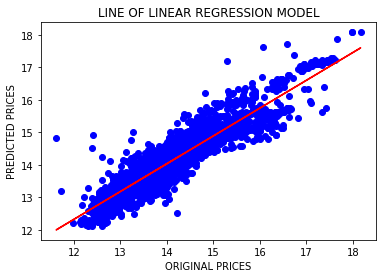

In [41]:
#MODEL TRAINING
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train, Y_train)

print ("Intercept:\n",lr_model.intercept_)
print ("\nCoefficient:\n",lr_model.coef_)

lr_pred = lr_model.predict(X_test)

#PRINTING ACCURACIES
print("FOR LINEAR REGRESSION:")
print("Accuracy:",calculate_accuracy(Y_test, lr_pred))
print("R-Square Score =",r2_score(Y_test, lr_pred))
print("RMSE =",np.sqrt(mean_squared_error(Y_test, lr_pred)))
visualizeResults(Y_test,lr_pred,"linear regression model")

# DECISION TREE REGRESSOR MODEL

FOR DECISION TREE:
Accuracy: 91.44932320897986
R-Square Score = 0.9374221735927171
RMSE = 0.1836979467300654


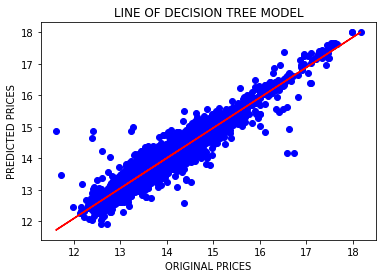

In [38]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, Y_train)

tree_pred = tree_model.predict(X_test)

print("FOR DECISION TREE:")
print("Accuracy:",calculate_accuracy(Y_test, tree_pred))
print("R-Square Score =",r2_score(Y_test, tree_pred))
print("RMSE =",np.sqrt(mean_squared_error(Y_test, tree_pred)))
visualizeResults(Y_test,tree_pred,"Decision Tree model")

# RANDOM FOREST REGRESSOR MODEL


FOR RANDOM FOREST TREE:
Accuracy: 94.23352041377792
R-Square Score = 0.9533625369516557
RMSE = 0.15858478725737077


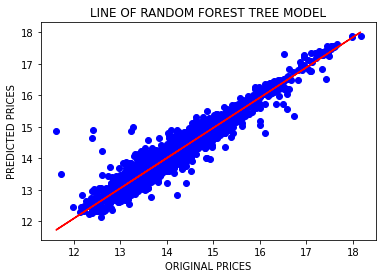

In [39]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, Y_train)

rf_pred = rf_model.predict(X_test)

print("\nFOR RANDOM FOREST TREE:")
print("Accuracy:",calculate_accuracy(Y_test, rf_pred))
print("R-Square Score =",r2_score(Y_test, rf_pred))
print("RMSE =",np.sqrt(mean_squared_error(Y_test, rf_pred)))
visualizeResults(Y_test,rf_pred,"Random Forest Tree model")

# K NEAREST NEIGHBOURS REGRESSOR MODEL

In [40]:
for i in range (1,20):
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model.fit(X_train, Y_train)
    knn_pred = knn_model.predict(X_test)
    print("Accuracy for,",i,":",calculate_accuracy(Y_test, knn_pred))

Accuracy for, 1 : 90.39286893364147
Accuracy for, 2 : 92.34070650379664
Accuracy for, 3 : 93.52921756355232
Accuracy for, 4 : 93.72730274017827
Accuracy for, 5 : 93.73830747221305
Accuracy for, 6 : 93.85935952459558
Accuracy for, 7 : 93.83735006052602
Accuracy for, 8 : 93.83735006052602
Accuracy for, 9 : 93.74931220424783
Accuracy for, 10 : 93.78232640035216
Accuracy for, 11 : 93.63926488390007
Accuracy for, 12 : 93.57323649169143
Accuracy for, 13 : 93.59524595576097
Accuracy for, 14 : 93.44117970727413
Accuracy for, 15 : 93.33113238692637
Accuracy for, 16 : 93.33113238692637
Accuracy for, 17 : 93.22108506657862
Accuracy for, 18 : 93.24309453064818
Accuracy for, 19 : 93.24309453064818



FOR KNN REGRESSOR:
Accuracy: 93.78232640035216
R-Square Score = 0.9488359334397858
RMSE = 0.16610266198331708


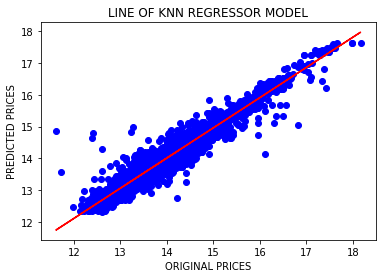

In [42]:
#MAX VALUE OF ACCURACY AT 10 HENCE:
knn_model = KNeighborsRegressor(n_neighbors = 10)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)
print("\nFOR KNN REGRESSOR:")
print("Accuracy:",calculate_accuracy(Y_test, knn_pred))
print("R-Square Score =",r2_score(Y_test, knn_pred))
print("RMSE =",np.sqrt(mean_squared_error(Y_test, knn_pred)))
visualizeResults(Y_test,knn_pred,"KNN REGRESSOR model")

# SUPPORT VECTOR MACHINE REGRESSOR MODEL(SVR)


FOR SUPPORT VECTOR MODEL:
Accuracy: 90.49191152195444
R-Square Score = 0.9303295053560503
RMSE = 0.19382889143695528


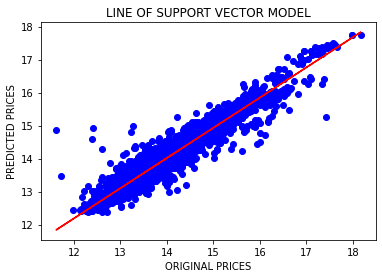

In [46]:
sv_model = svm.SVR()
sv_model.fit(X_train,Y_train)
sv_pred = sv_model.predict(X_test)

print("\nFOR SUPPORT VECTOR MODEL:")
print("Accuracy:",calculate_accuracy(Y_test, sv_pred))
print("R-Square Score =",r2_score(Y_test, sv_pred))
print("RMSE =",np.sqrt(mean_squared_error(Y_test, sv_pred)))
visualizeResults(Y_test,sv_pred,"SUPPORT VECTOR MODEL")

# NEURAL NETWORKING REGRESSOR MODEL (MLP)


FOR NEURAL NETWORKING MODEL:
Accuracy: 90.3378452734676
R-Square Score = 0.9327375676762276
RMSE = 0.19044972460193657


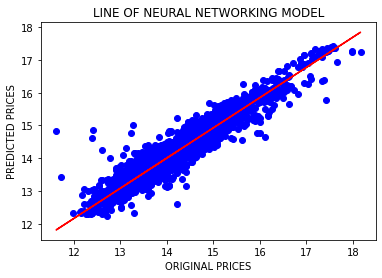

In [141]:
nn_model = MLPRegressor()
nn_model.fit(X_train, Y_train)
nn_pred = nn_model.predict(X_test)

print("\nFOR NEURAL NETWORKING MODEL:")
print("Accuracy:",calculate_accuracy(Y_test, nn_pred))
print("R-Square Score =",r2_score(Y_test, nn_pred))
print("RMSE =",np.sqrt(mean_squared_error(Y_test, nn_pred)))
visualizeResults(Y_test,nn_pred,"Neural Networking model")

# THE END